In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
from random import random,randint
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

## Побудуємо функцію виду  y = ax+b

In [164]:
 
a = randint(0, 100)
x = []

for i in range(50):
    x.append(round(random(),3))

b = randint(0, 17)
y = [a*i+b for i in x]

print("x = ", x)
print("a = ", a)
print("b = ", b)
print("y = ", y)

x =  [0.169, 0.33, 0.94, 0.523, 0.252, 0.287, 0.158, 0.312, 0.108, 0.368, 0.652, 0.621, 0.787, 0.55, 0.996, 0.156, 0.321, 0.651, 0.309, 0.832, 0.998, 0.169, 0.295, 0.25, 0.645, 0.384, 0.412, 0.035, 0.118, 0.675, 0.578, 0.391, 0.649, 0.592, 0.598, 0.258, 0.144, 0.616, 0.93, 0.509, 0.405, 0.924, 0.276, 0.838, 0.519, 0.488, 0.635, 0.376, 0.29, 0.665]
a =  69
b =  7
y =  [18.661, 29.77, 71.86, 43.087, 24.388, 26.802999999999997, 17.902, 28.528, 14.452, 32.391999999999996, 51.988, 49.849, 61.303000000000004, 44.95, 75.724, 17.764, 29.149, 51.919000000000004, 28.321, 64.40799999999999, 75.862, 18.661, 27.355, 24.25, 51.505, 33.496, 35.428, 9.415, 15.142, 53.575, 46.882, 33.979, 51.781, 47.848, 48.262, 24.802, 16.936, 49.504, 71.17, 42.121, 34.945, 70.756, 26.044, 64.822, 42.811, 40.672, 50.815, 32.944, 27.009999999999998, 52.885000000000005]


### Конвертуємо 1d масив в 2d масив, оскільки Scikit не працює з 1d масивами, а для побудови лінійної регресії потрібна ця бібліотека

In [165]:
x_new = np.reshape(x, (-1, 2))
y_new = np.reshape(y, (-1, 2))

## Побудова лінійної регресії

In [166]:
reg = LinearRegression()
reg.fit(x_new ,y_new)
Y_hat = reg.predict(x_new)
print("Y початкове:", y)
print("-------------------------------------------")
print("Y, що обраховано лінійною регресією:", Y_hat)

Y початкове: [18.661, 29.77, 71.86, 43.087, 24.388, 26.802999999999997, 17.902, 28.528, 14.452, 32.391999999999996, 51.988, 49.849, 61.303000000000004, 44.95, 75.724, 17.764, 29.149, 51.919000000000004, 28.321, 64.40799999999999, 75.862, 18.661, 27.355, 24.25, 51.505, 33.496, 35.428, 9.415, 15.142, 53.575, 46.882, 33.979, 51.781, 47.848, 48.262, 24.802, 16.936, 49.504, 71.17, 42.121, 34.945, 70.756, 26.044, 64.822, 42.811, 40.672, 50.815, 32.944, 27.009999999999998, 52.885000000000005]
-------------------------------------------
Y, що обраховано лінійною регресією: [[18.661 29.77 ]
 [71.86  43.087]
 [24.388 26.803]
 [17.902 28.528]
 [14.452 32.392]
 [51.988 49.849]
 [61.303 44.95 ]
 [75.724 17.764]
 [29.149 51.919]
 [28.321 64.408]
 [75.862 18.661]
 [27.355 24.25 ]
 [51.505 33.496]
 [35.428  9.415]
 [15.142 53.575]
 [46.882 33.979]
 [51.781 47.848]
 [48.262 24.802]
 [16.936 49.504]
 [71.17  42.121]
 [34.945 70.756]
 [26.044 64.822]
 [42.811 40.672]
 [50.815 32.944]
 [27.01  52.885]]


## Обрахунок MSE та MAE

In [167]:
square_err = mean_squared_error(y_new,Y_hat)
print("MSE = ", square_err )
abs_err = mean_absolute_error(y_new,Y_hat)
print("MAE = ", abs_err )

MSE =  9.277004245399098e-29
MAE =  7.887024366937111e-15


## Графік, де чорні точки - дані, що отримані внаслідок аналітичного обрахунку лінійної функції, а синя лінія - лінійна регресія

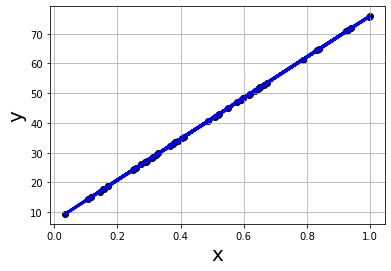

In [168]:
plt.scatter(x, y,  color='black')
plt.grid()
plt.plot(x_new, Y_hat, color='blue', linewidth=3)
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.show()

## Імпорт результатів у csv файл

In [170]:
headers = ['X', 'Y', 'Y_hat', 'MSE', 'MAE']
Y_hat = Y_hat.flatten()
with open('lab4_regression_results.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    for i in range(25):
        data = [x[i],y[i],round(Y_hat[i],3),square_err,abs_err]
        writer.writerow(data)